In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch

from netam import framework

In [2]:
pcp_df = pd.read_csv("~/data/shmoof_edges_11-Jan-2023_NoNode0_iqtree_K80+R_masked.csv")
crepe_prefix = "../train/trained_models/hs_cnn_ind_med"

assert framework.crepe_exists(crepe_prefix)
crepe = framework.load_crepe(crepe_prefix)

seqs = pcp_df.loc[1000:1002, "parent"]
rates, csp_logits = crepe(seqs)

<Axes: >

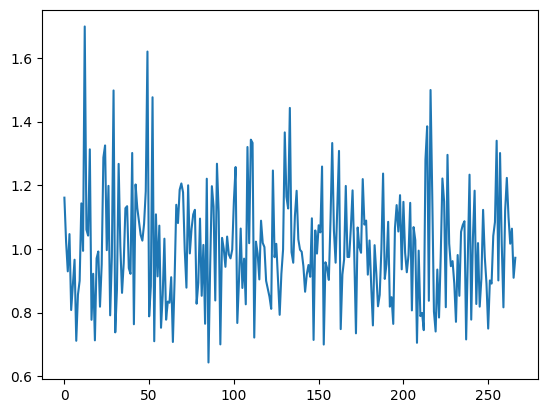

In [3]:
mask = crepe.encode_sequences([seqs.iloc[0]])[1].squeeze()
pd.Series(rates[0,mask].numpy()).plot()

In [4]:
csps = torch.softmax(csp_logits[0, mask], dim=1).numpy()
csps.shape

(267, 4)

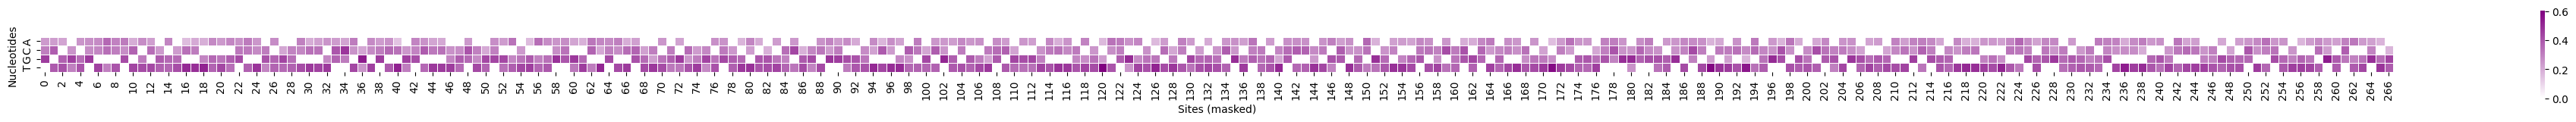

In [5]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list("not_viridis", ["white", "purple"])

# Create a DataFrame from the numpy array
df_csps = pd.DataFrame(csps.T, index=["A", "C", "G", "T"])


# Create the heatmap
plt.figure(figsize=(50, 3))
sns.heatmap(df_csps, annot=False, cmap=cmap, linewidths=.5, square=True, cbar_kws={"shrink": .5})

# Setting labels
plt.xlabel("Sites (masked)")
plt.ylabel("Nucleotides")

# Show the plot
plt.show()


<Axes: >

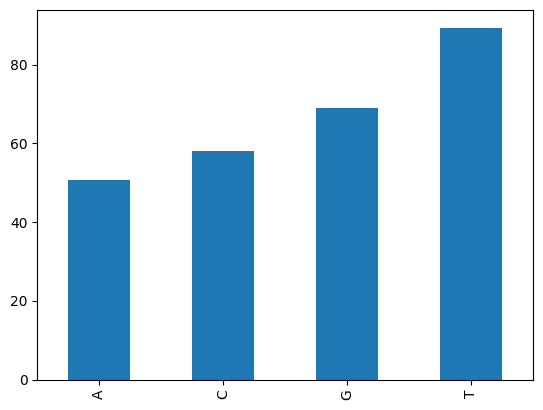

In [6]:
pd.Series(csps.sum(axis=0), index=["A", "C", "G", "T"]).plot(kind="bar")